In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [26]:
os.chdir('C:\\Users\\User')

In [27]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [28]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [29]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [30]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [31]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [32]:
tsr_theta_train.shape

(394, 2, 1)

In [33]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 5ms/step - loss: 0.0110 - rmse: 0.1039
Epoch 2/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1023
Epoch 3/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0988
Epoch 4/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0918
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0864
Epoch 6/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0843
Epoch 7/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0841
Epoch 8/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 9/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 10/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 88/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 89/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 91/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 92/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 93/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0722
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0721
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0721
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0720
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0718
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0716
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0715
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0714
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0713
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0610
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0605
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0604
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0604
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 254/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0599
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0596
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 257/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0588
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0454
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 335/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0448
Epoch 337/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 338/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 339/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0443
Epoch 340/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0444
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0356
Epoch 415/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0353
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 417/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 418/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 419/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 420/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 421/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 9.5320e-04 - rmse: 0.0292
Epoch 496/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3876e-04 - rmse: 0.0290
Epoch 497/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3394e-04 - rmse: 0.0289
Epoch 498/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3882e-04 - rmse: 0.0290
Epoch 499/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4159e-04 - rmse: 0.0290
Epoch 500/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3350e-04 - rmse: 0.0289
Epoch 501/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2831e-04 - rmse: 0.0288
Epoch 502/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2439e-04 - rmse: 0.0287
Epoch 503/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2734e-04 - rmse: 0.0288
Epoch 504/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2227e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 7.3765e-04 - rmse: 0.0253
Epoch 575/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3098e-04 - rmse: 0.0252
Epoch 576/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3717e-04 - rmse: 0.0253
Epoch 577/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3970e-04 - rmse: 0.0254
Epoch 578/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2562e-04 - rmse: 0.0251
Epoch 579/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1918e-04 - rmse: 0.0249
Epoch 580/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1088e-04 - rmse: 0.0248
Epoch 581/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1456e-04 - rmse: 0.0249
Epoch 582/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0950e-04 - rmse: 0.0248
Epoch 583/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1268e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 5.9728e-04 - rmse: 0.0224
Epoch 654/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8876e-04 - rmse: 0.0222
Epoch 655/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8080e-04 - rmse: 0.0220
Epoch 656/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8256e-04 - rmse: 0.0221
Epoch 657/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8569e-04 - rmse: 0.0222
Epoch 658/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8034e-04 - rmse: 0.0220
Epoch 659/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7557e-04 - rmse: 0.0219
Epoch 660/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6494e-04 - rmse: 0.0217
Epoch 661/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6445e-04 - rmse: 0.0217
Epoch 662/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6810e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 4.7367e-04 - rmse: 0.0195
Epoch 733/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7826e-04 - rmse: 0.0196
Epoch 734/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7671e-04 - rmse: 0.0196
Epoch 735/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7397e-04 - rmse: 0.0195
Epoch 736/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7770e-04 - rmse: 0.0196
Epoch 737/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6509e-04 - rmse: 0.0193
Epoch 738/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6083e-04 - rmse: 0.0192
Epoch 739/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6041e-04 - rmse: 0.0192
Epoch 740/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6031e-04 - rmse: 0.0192
Epoch 741/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5732e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 3.9818e-04 - rmse: 0.0175
Epoch 812/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9900e-04 - rmse: 0.0175
Epoch 813/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9456e-04 - rmse: 0.0174
Epoch 814/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8952e-04 - rmse: 0.0172
Epoch 815/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8308e-04 - rmse: 0.0170
Epoch 816/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8314e-04 - rmse: 0.0170
Epoch 817/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8967e-04 - rmse: 0.0172
Epoch 818/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8999e-04 - rmse: 0.0173
Epoch 819/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8349e-04 - rmse: 0.0171
Epoch 820/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7989e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 3.2874e-04 - rmse: 0.0154
Epoch 891/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3299e-04 - rmse: 0.0155
Epoch 892/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3994e-04 - rmse: 0.0158
Epoch 893/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3143e-04 - rmse: 0.0155
Epoch 894/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2941e-04 - rmse: 0.0154
Epoch 895/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2638e-04 - rmse: 0.0153
Epoch 896/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2594e-04 - rmse: 0.0153
Epoch 897/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2359e-04 - rmse: 0.0152
Epoch 898/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2737e-04 - rmse: 0.0154
Epoch 899/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3284e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.8939e-04 - rmse: 0.0141
Epoch 970/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8959e-04 - rmse: 0.0141
Epoch 971/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9275e-04 - rmse: 0.0142
Epoch 972/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8776e-04 - rmse: 0.0140
Epoch 973/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9051e-04 - rmse: 0.0141
Epoch 974/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8795e-04 - rmse: 0.0140
Epoch 975/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8382e-04 - rmse: 0.0139
Epoch 976/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8201e-04 - rmse: 0.0138
Epoch 977/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8329e-04 - rmse: 0.0139
Epoch 978/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8563e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.6408e-04 - rmse: 0.0132
Epoch 1049/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6468e-04 - rmse: 0.0132
Epoch 1050/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6316e-04 - rmse: 0.0131
Epoch 1051/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6287e-04 - rmse: 0.0131
Epoch 1052/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5878e-04 - rmse: 0.0130
Epoch 1053/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6783e-04 - rmse: 0.0133
Epoch 1054/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6500e-04 - rmse: 0.0132
Epoch 1055/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6326e-04 - rmse: 0.0132
Epoch 1056/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6182e-04 - rmse: 0.0131
Epoch 1057/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.4016e-04 - rmse: 0.0123
Epoch 1127/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3862e-04 - rmse: 0.0122
Epoch 1128/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3810e-04 - rmse: 0.0122
Epoch 1129/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3846e-04 - rmse: 0.0122
Epoch 1130/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3925e-04 - rmse: 0.0122
Epoch 1131/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3252e-04 - rmse: 0.0119
Epoch 1132/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2928e-04 - rmse: 0.0118
Epoch 1133/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2838e-04 - rmse: 0.0118
Epoch 1134/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3052e-04 - rmse: 0.0119
Epoch 1135/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.2275e-04 - rmse: 0.0116
Epoch 1205/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2144e-04 - rmse: 0.0115
Epoch 1206/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1811e-04 - rmse: 0.0114
Epoch 1207/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1920e-04 - rmse: 0.0114
Epoch 1208/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2142e-04 - rmse: 0.0115
Epoch 1209/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2365e-04 - rmse: 0.0116
Epoch 1210/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1695e-04 - rmse: 0.0113
Epoch 1211/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1757e-04 - rmse: 0.0113
Epoch 1212/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2009e-04 - rmse: 0.0114
Epoch 1213/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 2.2088e-04 - rmse: 0.0115
Epoch 1283/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1366e-04 - rmse: 0.0112
Epoch 1284/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1483e-04 - rmse: 0.0112
Epoch 1285/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1398e-04 - rmse: 0.0112
Epoch 1286/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0996e-04 - rmse: 0.0110
Epoch 1287/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1185e-04 - rmse: 0.0111
Epoch 1288/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0971e-04 - rmse: 0.0110
Epoch 1289/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0871e-04 - rmse: 0.0110
Epoch 1290/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0668e-04 - rmse: 0.0109
Epoch 1291/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 1.9370e-04 - rmse: 0.0103
Epoch 1361/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0368e-04 - rmse: 0.0108
Epoch 1362/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0106e-04 - rmse: 0.0106
Epoch 1363/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9600e-04 - rmse: 0.0104
Epoch 1364/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9359e-04 - rmse: 0.0103
Epoch 1365/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9170e-04 - rmse: 0.0102
Epoch 1366/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8964e-04 - rmse: 0.0101
Epoch 1367/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9584e-04 - rmse: 0.0104
Epoch 1368/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9945e-04 - rmse: 0.0106
Epoch 1369/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.8713e-04 - rmse: 0.0100
Epoch 1439/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0092e-04 - rmse: 0.0107
Epoch 1440/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0801e-04 - rmse: 0.0110
Epoch 1441/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9501e-04 - rmse: 0.0104
Epoch 1442/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9244e-04 - rmse: 0.0103
Epoch 1443/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9196e-04 - rmse: 0.0102
Epoch 1444/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9117e-04 - rmse: 0.0102
Epoch 1445/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8968e-04 - rmse: 0.0101
Epoch 1446/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8593e-04 - rmse: 0.0099
Epoch 1447/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 1.8130e-04 - rmse: 0.0097
Epoch 1517/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8128e-04 - rmse: 0.0097
Epoch 1518/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8223e-04 - rmse: 0.0098
Epoch 1519/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7799e-04 - rmse: 0.0096
Epoch 1520/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7925e-04 - rmse: 0.0096
Epoch 1521/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8558e-04 - rmse: 0.0099
Epoch 1522/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8632e-04 - rmse: 0.0100
Epoch 1523/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9344e-04 - rmse: 0.0103
Epoch 1524/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9598e-04 - rmse: 0.0105
Epoch 1525/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8

10/10 [==============================] - 0s 5ms/step - loss: 1.7365e-04 - rmse: 0.0094
Epoch 1595/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6933e-04 - rmse: 0.0091
Epoch 1596/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7193e-04 - rmse: 0.0093
Epoch 1597/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7288e-04 - rmse: 0.0093
Epoch 1598/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7389e-04 - rmse: 0.0094
Epoch 1599/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7500e-04 - rmse: 0.0094
Epoch 1600/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7422e-04 - rmse: 0.0094
Epoch 1601/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7141e-04 - rmse: 0.0092
Epoch 1602/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6938e-04 - rmse: 0.0091
Epoch 1603/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.7270e-04 - rmse: 0.0093
Epoch 1673/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7153e-04 - rmse: 0.0093
Epoch 1674/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6977e-04 - rmse: 0.0092
Epoch 1675/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7363e-04 - rmse: 0.0094
Epoch 1676/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7410e-04 - rmse: 0.0094
Epoch 1677/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7388e-04 - rmse: 0.0094
Epoch 1678/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7385e-04 - rmse: 0.0094
Epoch 1679/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7304e-04 - rmse: 0.0094
Epoch 1680/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7154e-04 - rmse: 0.0093
Epoch 1681/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.6026e-04 - rmse: 0.0087
Epoch 1751/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6781e-04 - rmse: 0.0091
Epoch 1752/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6524e-04 - rmse: 0.0090
Epoch 1753/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6085e-04 - rmse: 0.0087
Epoch 1754/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6267e-04 - rmse: 0.0088
Epoch 1755/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5977e-04 - rmse: 0.0087
Epoch 1756/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5936e-04 - rmse: 0.0086
Epoch 1757/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6733e-04 - rmse: 0.0091
Epoch 1758/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6561e-04 - rmse: 0.0090
Epoch 1759/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.6481e-04 - rmse: 0.0090
Epoch 1829/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6241e-04 - rmse: 0.0088
Epoch 1830/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6786e-04 - rmse: 0.0091
Epoch 1831/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6325e-04 - rmse: 0.0089
Epoch 1832/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6075e-04 - rmse: 0.0087
Epoch 1833/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6407e-04 - rmse: 0.0089
Epoch 1834/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6785e-04 - rmse: 0.0091
Epoch 1835/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6218e-04 - rmse: 0.0088
Epoch 1836/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5390e-04 - rmse: 0.0083
Epoch 1837/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.5116e-04 - rmse: 0.0082
Epoch 1907/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5130e-04 - rmse: 0.0082
Epoch 1908/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5426e-04 - rmse: 0.0084
Epoch 1909/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5855e-04 - rmse: 0.0086
Epoch 1910/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6670e-04 - rmse: 0.0091
Epoch 1911/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6557e-04 - rmse: 0.0090
Epoch 1912/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6341e-04 - rmse: 0.0089
Epoch 1913/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5428e-04 - rmse: 0.0084
Epoch 1914/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5290e-04 - rmse: 0.0083
Epoch 1915/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.5596e-04 - rmse: 0.0085
Epoch 1985/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5226e-04 - rmse: 0.0083
Epoch 1986/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5139e-04 - rmse: 0.0083
Epoch 1987/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4542e-04 - rmse: 0.0079
Epoch 1988/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5201e-04 - rmse: 0.0083
Epoch 1989/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5263e-04 - rmse: 0.0083
Epoch 1990/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4986e-04 - rmse: 0.0082
Epoch 1991/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5056e-04 - rmse: 0.0082
Epoch 1992/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4645e-04 - rmse: 0.0080
Epoch 1993/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.5544e-04 - rmse: 0.0085
Epoch 2063/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5228e-04 - rmse: 0.0083
Epoch 2064/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5018e-04 - rmse: 0.0082
Epoch 2065/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5289e-04 - rmse: 0.0084
Epoch 2066/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4749e-04 - rmse: 0.0081
Epoch 2067/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4654e-04 - rmse: 0.0080
Epoch 2068/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4579e-04 - rmse: 0.0079
Epoch 2069/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4930e-04 - rmse: 0.0082
Epoch 2070/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5444e-04 - rmse: 0.0085
Epoch 2071/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.4373e-04 - rmse: 0.0078
Epoch 2141/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4212e-04 - rmse: 0.0077
Epoch 2142/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4066e-04 - rmse: 0.0077
Epoch 2143/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4122e-04 - rmse: 0.0077
Epoch 2144/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4238e-04 - rmse: 0.0078
Epoch 2145/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4552e-04 - rmse: 0.0080
Epoch 2146/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4912e-04 - rmse: 0.0082
Epoch 2147/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4409e-04 - rmse: 0.0079
Epoch 2148/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3717e-04 - rmse: 0.0074
Epoch 2149/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.4238e-04 - rmse: 0.0078
Epoch 2219/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3925e-04 - rmse: 0.0076
Epoch 2220/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3659e-04 - rmse: 0.0074
Epoch 2221/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3880e-04 - rmse: 0.0076
Epoch 2222/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4472e-04 - rmse: 0.0079
Epoch 2223/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4087e-04 - rmse: 0.0077
Epoch 2224/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4291e-04 - rmse: 0.0078
Epoch 2225/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4610e-04 - rmse: 0.0080
Epoch 2226/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4774e-04 - rmse: 0.0081
Epoch 2227/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.3736e-04 - rmse: 0.0075
Epoch 2297/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3848e-04 - rmse: 0.0076
Epoch 2298/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3309e-04 - rmse: 0.0072
Epoch 2299/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3341e-04 - rmse: 0.0072
Epoch 2300/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3510e-04 - rmse: 0.0074
Epoch 2301/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3493e-04 - rmse: 0.0073
Epoch 2302/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3556e-04 - rmse: 0.0074
Epoch 2303/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4168e-04 - rmse: 0.0078
Epoch 2304/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5973e-04 - rmse: 0.0089
Epoch 2305/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.3163e-04 - rmse: 0.0071
Epoch 2375/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2916e-04 - rmse: 0.0070
Epoch 2376/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3258e-04 - rmse: 0.0072
Epoch 2377/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2990e-04 - rmse: 0.0070
Epoch 2378/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2946e-04 - rmse: 0.0070
Epoch 2379/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3078e-04 - rmse: 0.0071
Epoch 2380/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3426e-04 - rmse: 0.0073
Epoch 2381/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3291e-04 - rmse: 0.0072
Epoch 2382/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3111e-04 - rmse: 0.0071
Epoch 2383/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.2857e-04 - rmse: 0.0070
Epoch 2453/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3119e-04 - rmse: 0.0072
Epoch 2454/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3248e-04 - rmse: 0.0072
Epoch 2455/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3150e-04 - rmse: 0.0072
Epoch 2456/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3196e-04 - rmse: 0.0072
Epoch 2457/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3242e-04 - rmse: 0.0072
Epoch 2458/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3379e-04 - rmse: 0.0073
Epoch 2459/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3411e-04 - rmse: 0.0074
Epoch 2460/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3982e-04 - rmse: 0.0077
Epoch 2461/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.2718e-04 - rmse: 0.0069
Epoch 2531/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3232e-04 - rmse: 0.0073
Epoch 2532/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3676e-04 - rmse: 0.0076
Epoch 2533/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5213e-04 - rmse: 0.0085
Epoch 2534/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4574e-04 - rmse: 0.0081
Epoch 2535/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3795e-04 - rmse: 0.0076
Epoch 2536/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3531e-04 - rmse: 0.0075
Epoch 2537/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3263e-04 - rmse: 0.0073
Epoch 2538/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3402e-04 - rmse: 0.0074
Epoch 2539/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2536e-04 - rmse: 0.0068
Epoch 2609/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2571e-04 - rmse: 0.0068
Epoch 2610/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2546e-04 - rmse: 0.0068
Epoch 2611/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2949e-04 - rmse: 0.0071
Epoch 2612/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2596e-04 - rmse: 0.0069
Epoch 2613/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3340e-04 - rmse: 0.0074
Epoch 2614/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3106e-04 - rmse: 0.0072
Epoch 2615/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2596e-04 - rmse: 0.0069
Epoch 2616/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2438e-04 - rmse: 0.0067
Epoch 2617/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2677e-04 - rmse: 0.0070
Epoch 2687/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2783e-04 - rmse: 0.0070
Epoch 2688/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2722e-04 - rmse: 0.0070
Epoch 2689/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2946e-04 - rmse: 0.0071
Epoch 2690/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3023e-04 - rmse: 0.0072
Epoch 2691/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2488e-04 - rmse: 0.0068
Epoch 2692/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3069e-04 - rmse: 0.0072
Epoch 2693/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3103e-04 - rmse: 0.0073
Epoch 2694/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2778e-04 - rmse: 0.0070
Epoch 2695/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2266e-04 - rmse: 0.0067
Epoch 2765/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2225e-04 - rmse: 0.0067
Epoch 2766/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2884e-04 - rmse: 0.0071
Epoch 2767/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3644e-04 - rmse: 0.0077
Epoch 2768/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3975e-04 - rmse: 0.0079
Epoch 2769/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3989e-04 - rmse: 0.0079
Epoch 2770/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3204e-04 - rmse: 0.0074
Epoch 2771/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2835e-04 - rmse: 0.0071
Epoch 2772/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3018e-04 - rmse: 0.0072
Epoch 2773/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2718e-04 - rmse: 0.0071
Epoch 2843/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2830e-04 - rmse: 0.0071
Epoch 2844/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2576e-04 - rmse: 0.0070
Epoch 2845/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2754e-04 - rmse: 0.0071
Epoch 2846/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2931e-04 - rmse: 0.0072
Epoch 2847/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2831e-04 - rmse: 0.0071
Epoch 2848/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2179e-04 - rmse: 0.0067
Epoch 2849/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2311e-04 - rmse: 0.0068
Epoch 2850/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2490e-04 - rmse: 0.0069
Epoch 2851/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.3925e-04 - rmse: 0.0079
Epoch 2921/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2360e-04 - rmse: 0.0068
Epoch 2922/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2483e-04 - rmse: 0.0069
Epoch 2923/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1874e-04 - rmse: 0.0065
Epoch 2924/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2016e-04 - rmse: 0.0066
Epoch 2925/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2392e-04 - rmse: 0.0069
Epoch 2926/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2574e-04 - rmse: 0.0070
Epoch 2927/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2765e-04 - rmse: 0.0071
Epoch 2928/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2565e-04 - rmse: 0.0070
Epoch 2929/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2180e-04 - rmse: 0.0067
Epoch 2999/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2839e-04 - rmse: 0.0072
Epoch 3000/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2058e-04 - rmse: 0.0066
Epoch 3001/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2198e-04 - rmse: 0.0067
Epoch 3002/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2877e-04 - rmse: 0.0072
Epoch 3003/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2868e-04 - rmse: 0.0072
Epoch 3004/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2824e-04 - rmse: 0.0072
Epoch 3005/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2412e-04 - rmse: 0.0069
Epoch 3006/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2429e-04 - rmse: 0.0069
Epoch 3007/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2278e-04 - rmse: 0.0068
Epoch 3077/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2271e-04 - rmse: 0.0068
Epoch 3078/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2723e-04 - rmse: 0.0072
Epoch 3079/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2917e-04 - rmse: 0.0073
Epoch 3080/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2638e-04 - rmse: 0.0071
Epoch 3081/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3141e-04 - rmse: 0.0074
Epoch 3082/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3147e-04 - rmse: 0.0075
Epoch 3083/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2453e-04 - rmse: 0.0070
Epoch 3084/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2177e-04 - rmse: 0.0068
Epoch 3085/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1823e-04 - rmse: 0.0065
Epoch 3155/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2195e-04 - rmse: 0.0068
Epoch 3156/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2152e-04 - rmse: 0.0068
Epoch 3157/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1834e-04 - rmse: 0.0065
Epoch 3158/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1695e-04 - rmse: 0.0064
Epoch 3159/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2022e-04 - rmse: 0.0067
Epoch 3160/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1897e-04 - rmse: 0.0066
Epoch 3161/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1770e-04 - rmse: 0.0065
Epoch 3162/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1684e-04 - rmse: 0.0064
Epoch 3163/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.2412e-04 - rmse: 0.0070
Epoch 3233/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2085e-04 - rmse: 0.0068
Epoch 3234/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1620e-04 - rmse: 0.0064
Epoch 3235/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1384e-04 - rmse: 0.0062
Epoch 3236/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1936e-04 - rmse: 0.0067
Epoch 3237/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1491e-04 - rmse: 0.0063
Epoch 3238/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1412e-04 - rmse: 0.0063
Epoch 3239/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1334e-04 - rmse: 0.0062
Epoch 3240/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1198e-04 - rmse: 0.0061
Epoch 3241/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.2383e-04 - rmse: 0.0070
Epoch 3311/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1859e-04 - rmse: 0.0066
Epoch 3312/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2340e-04 - rmse: 0.0070
Epoch 3313/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1751e-04 - rmse: 0.0066
Epoch 3314/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1621e-04 - rmse: 0.0065
Epoch 3315/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1688e-04 - rmse: 0.0065
Epoch 3316/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1534e-04 - rmse: 0.0064
Epoch 3317/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1051e-04 - rmse: 0.0060
Epoch 3318/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1713e-04 - rmse: 0.0065
Epoch 3319/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0911e-04 - rmse: 0.0059
Epoch 3389/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0687e-04 - rmse: 0.0057
Epoch 3390/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0484e-04 - rmse: 0.0055
Epoch 3391/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0760e-04 - rmse: 0.0058
Epoch 3392/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1256e-04 - rmse: 0.0062
Epoch 3393/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1557e-04 - rmse: 0.0064
Epoch 3394/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2195e-04 - rmse: 0.0069
Epoch 3395/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2668e-04 - rmse: 0.0073
Epoch 3396/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2402e-04 - rmse: 0.0071
Epoch 3397/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1026e-04 - rmse: 0.0061
Epoch 3467/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1575e-04 - rmse: 0.0065
Epoch 3468/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1352e-04 - rmse: 0.0063
Epoch 3469/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0803e-04 - rmse: 0.0059
Epoch 3470/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1566e-04 - rmse: 0.0065
Epoch 3471/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2526e-04 - rmse: 0.0072
Epoch 3472/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2045e-04 - rmse: 0.0068
Epoch 3473/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2494e-04 - rmse: 0.0072
Epoch 3474/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2739e-04 - rmse: 0.0073
Epoch 3475/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.0671e-04 - rmse: 0.0058
Epoch 3545/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0975e-04 - rmse: 0.0060
Epoch 3546/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1023e-04 - rmse: 0.0061
Epoch 3547/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1158e-04 - rmse: 0.0062
Epoch 3548/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0956e-04 - rmse: 0.0060
Epoch 3549/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0718e-04 - rmse: 0.0058
Epoch 3550/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0474e-04 - rmse: 0.0056
Epoch 3551/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0885e-04 - rmse: 0.0060
Epoch 3552/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1256e-04 - rmse: 0.0063
Epoch 3553/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0767e-04 - rmse: 0.0059
Epoch 3623/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0701e-04 - rmse: 0.0059
Epoch 3624/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1101e-04 - rmse: 0.0062
Epoch 3625/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0677e-04 - rmse: 0.0058
Epoch 3626/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0832e-04 - rmse: 0.0060
Epoch 3627/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1327e-04 - rmse: 0.0064
Epoch 3628/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1066e-04 - rmse: 0.0062
Epoch 3629/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0856e-04 - rmse: 0.0060
Epoch 3630/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0808e-04 - rmse: 0.0059
Epoch 3631/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.2393e-04 - rmse: 0.0072
Epoch 3701/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2090e-04 - rmse: 0.0070
Epoch 3702/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2445e-04 - rmse: 0.0072
Epoch 3703/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1583e-04 - rmse: 0.0066
Epoch 3704/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1101e-04 - rmse: 0.0062
Epoch 3705/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1163e-04 - rmse: 0.0063
Epoch 3706/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3315e-04 - rmse: 0.0078
Epoch 3707/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2312e-04 - rmse: 0.0071
Epoch 3708/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1308e-04 - rmse: 0.0064
Epoch 3709/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0785e-04 - rmse: 0.0060
Epoch 3779/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0555e-04 - rmse: 0.0058
Epoch 3780/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0418e-04 - rmse: 0.0057
Epoch 3781/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0631e-04 - rmse: 0.0059
Epoch 3782/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1798e-04 - rmse: 0.0068
Epoch 3783/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0958e-04 - rmse: 0.0061
Epoch 3784/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0646e-04 - rmse: 0.0059
Epoch 3785/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0428e-04 - rmse: 0.0057
Epoch 3786/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0713e-04 - rmse: 0.0059
Epoch 3787/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1072e-04 - rmse: 0.0063
Epoch 3857/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0559e-04 - rmse: 0.0058
Epoch 3858/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0610e-04 - rmse: 0.0059
Epoch 3859/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0705e-04 - rmse: 0.0060
Epoch 3860/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0777e-04 - rmse: 0.0060
Epoch 3861/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0845e-04 - rmse: 0.0061
Epoch 3862/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0302e-04 - rmse: 0.0056
Epoch 3863/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0298e-04 - rmse: 0.0056
Epoch 3864/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0248e-04 - rmse: 0.0056
Epoch 3865/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0751e-04 - rmse: 0.0060
Epoch 3935/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1539e-04 - rmse: 0.0067
Epoch 3936/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0964e-04 - rmse: 0.0062
Epoch 3937/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1100e-04 - rmse: 0.0063
Epoch 3938/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0666e-04 - rmse: 0.0060
Epoch 3939/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0506e-04 - rmse: 0.0058
Epoch 3940/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1593e-04 - rmse: 0.0067
Epoch 3941/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0547e-04 - rmse: 0.0059
Epoch 3942/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0440e-04 - rmse: 0.0058
Epoch 3943/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0336e-04 - rmse: 0.0057
Epoch 4013/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0299e-04 - rmse: 0.0057
Epoch 4014/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0173e-04 - rmse: 0.0056
Epoch 4015/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0494e-04 - rmse: 0.0059
Epoch 4016/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0723e-04 - rmse: 0.0060
Epoch 4017/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0419e-04 - rmse: 0.0058
Epoch 4018/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0812e-04 - rmse: 0.0061
Epoch 4019/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0733e-04 - rmse: 0.0061
Epoch 4020/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0646e-04 - rmse: 0.0060
Epoch 4021/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0969e-04 - rmse: 0.0063
Epoch 4091/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0770e-04 - rmse: 0.0061
Epoch 4092/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1193e-04 - rmse: 0.0065
Epoch 4093/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0673e-04 - rmse: 0.0060
Epoch 4094/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1478e-04 - rmse: 0.0067
Epoch 4095/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1704e-04 - rmse: 0.0068
Epoch 4096/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1757e-04 - rmse: 0.0069
Epoch 4097/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0683e-04 - rmse: 0.0061
Epoch 4098/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0398e-04 - rmse: 0.0058
Epoch 4099/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.8391e-05 - rmse: 0.0053
Epoch 4169/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9772e-05 - rmse: 0.0055
Epoch 4170/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0844e-04 - rmse: 0.0062
Epoch 4171/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1089e-04 - rmse: 0.0064
Epoch 4172/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0565e-04 - rmse: 0.0060
Epoch 4173/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0177e-04 - rmse: 0.0057
Epoch 4174/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0348e-04 - rmse: 0.0058
Epoch 4175/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0528e-04 - rmse: 0.0060
Epoch 4176/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0999e-04 - rmse: 0.0063
Epoch 4177/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0792e-04 - rmse: 0.0062
Epoch 4247/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0058e-04 - rmse: 0.0056
Epoch 4248/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0064e-04 - rmse: 0.0056
Epoch 4249/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0147e-04 - rmse: 0.0057
Epoch 4250/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5561e-05 - rmse: 0.0051
Epoch 4251/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5421e-05 - rmse: 0.0051
Epoch 4252/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0080e-04 - rmse: 0.0056
Epoch 4253/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0116e-04 - rmse: 0.0056
Epoch 4254/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0650e-04 - rmse: 0.0061
Epoch 4255/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.7993e-05 - rmse: 0.0054
Epoch 4325/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6617e-05 - rmse: 0.0052
Epoch 4326/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0868e-04 - rmse: 0.0063
Epoch 4327/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0786e-04 - rmse: 0.0062
Epoch 4328/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0786e-04 - rmse: 0.0062
Epoch 4329/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1533e-04 - rmse: 0.0068
Epoch 4330/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1300e-04 - rmse: 0.0066
Epoch 4331/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0340e-04 - rmse: 0.0059
Epoch 4332/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0769e-04 - rmse: 0.0062
Epoch 4333/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0583e-04 - rmse: 0.0061
Epoch 4403/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1337e-04 - rmse: 0.0067
Epoch 4404/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1118e-04 - rmse: 0.0065
Epoch 4405/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1299e-04 - rmse: 0.0067
Epoch 4406/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0910e-04 - rmse: 0.0064
Epoch 4407/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0599e-04 - rmse: 0.0061
Epoch 4408/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0233e-04 - rmse: 0.0058
Epoch 4409/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0394e-04 - rmse: 0.0059
Epoch 4410/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0532e-04 - rmse: 0.0061
Epoch 4411/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0887e-04 - rmse: 0.0064
Epoch 4481/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0474e-04 - rmse: 0.0060
Epoch 4482/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0271e-04 - rmse: 0.0059
Epoch 4483/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0042e-04 - rmse: 0.0057
Epoch 4484/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0248e-04 - rmse: 0.0058
Epoch 4485/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9404e-05 - rmse: 0.0056
Epoch 4486/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9823e-05 - rmse: 0.0056
Epoch 4487/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0313e-04 - rmse: 0.0059
Epoch 4488/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0121e-04 - rmse: 0.0057
Epoch 4489/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0021e-04 - rmse: 0.0057
Epoch 4559/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0697e-04 - rmse: 0.0062
Epoch 4560/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9663e-05 - rmse: 0.0056
Epoch 4561/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8724e-05 - rmse: 0.0056
Epoch 4562/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7596e-05 - rmse: 0.0054
Epoch 4563/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0271e-04 - rmse: 0.0059
Epoch 4564/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0363e-04 - rmse: 0.0060
Epoch 4565/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0105e-04 - rmse: 0.0058
Epoch 4566/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0130e-04 - rmse: 0.0058
Epoch 4567/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7

10/10 [==============================] - 0s 5ms/step - loss: 9.9134e-05 - rmse: 0.0056
Epoch 4637/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9910e-05 - rmse: 0.0057
Epoch 4638/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4028e-05 - rmse: 0.0051
Epoch 4639/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2906e-05 - rmse: 0.0050
Epoch 4640/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4555e-05 - rmse: 0.0052
Epoch 4641/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5187e-05 - rmse: 0.0053
Epoch 4642/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9211e-05 - rmse: 0.0056
Epoch 4643/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4630e-05 - rmse: 0.0052
Epoch 4644/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5524e-05 - rmse: 0.0053
Epoch 4645/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6

10/10 [==============================] - 0s 5ms/step - loss: 1.0134e-04 - rmse: 0.0058
Epoch 4715/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6846e-05 - rmse: 0.0054
Epoch 4716/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9492e-05 - rmse: 0.0057
Epoch 4717/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0271e-04 - rmse: 0.0060
Epoch 4718/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8697e-05 - rmse: 0.0056
Epoch 4719/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3658e-05 - rmse: 0.0051
Epoch 4720/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0210e-04 - rmse: 0.0059
Epoch 4721/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6961e-05 - rmse: 0.0055
Epoch 4722/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3723e-05 - rmse: 0.0052
Epoch 4723/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 9.9137e-05 - rmse: 0.0057
Epoch 4793/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4209e-05 - rmse: 0.0052
Epoch 4794/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4838e-05 - rmse: 0.0053
Epoch 4795/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1993e-05 - rmse: 0.0050
Epoch 4796/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8972e-05 - rmse: 0.0047
Epoch 4797/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7718e-05 - rmse: 0.0046
Epoch 4798/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1767e-05 - rmse: 0.0050
Epoch 4799/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2836e-05 - rmse: 0.0051
Epoch 4800/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0439e-04 - rmse: 0.0061
Epoch 4801/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 8.8517e-05 - rmse: 0.0047
Epoch 4871/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3082e-05 - rmse: 0.0052
Epoch 4872/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4949e-05 - rmse: 0.0053
Epoch 4873/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0580e-04 - rmse: 0.0063
Epoch 4874/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0626e-04 - rmse: 0.0063
Epoch 4875/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0839e-04 - rmse: 0.0065
Epoch 4876/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0847e-04 - rmse: 0.0065
Epoch 4877/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8615e-05 - rmse: 0.0057
Epoch 4878/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6876e-05 - rmse: 0.0055
Epoch 4879/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8

10/10 [==============================] - 0s 6ms/step - loss: 1.0255e-04 - rmse: 0.0060
Epoch 4949/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0511e-04 - rmse: 0.0062
Epoch 4950/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7442e-05 - rmse: 0.0056
Epoch 4951/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2988e-05 - rmse: 0.0052
Epoch 4952/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3633e-05 - rmse: 0.0052
Epoch 4953/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0329e-04 - rmse: 0.0061
Epoch 4954/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7024e-05 - rmse: 0.0056
Epoch 4955/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5887e-05 - rmse: 0.0055
Epoch 4956/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1009e-05 - rmse: 0.0050
Epoch 4957/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 6ms/step - loss: 8.9438e-05 - rmse: 0.0049
Epoch 5027/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7494e-05 - rmse: 0.0056
Epoch 5028/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7430e-05 - rmse: 0.0056
Epoch 5029/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5283e-05 - rmse: 0.0054
Epoch 5030/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7035e-05 - rmse: 0.0056
Epoch 5031/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1557e-05 - rmse: 0.0051
Epoch 5032/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4223e-05 - rmse: 0.0053
Epoch 5033/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7446e-05 - rmse: 0.0056
Epoch 5034/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0563e-04 - rmse: 0.0063
Epoch 5035/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8

10/10 [==============================] - 0s 6ms/step - loss: 1.0647e-04 - rmse: 0.0064
Epoch 5105/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8065e-05 - rmse: 0.0057
Epoch 5106/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5184e-05 - rmse: 0.0055
Epoch 5107/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8926e-05 - rmse: 0.0058
Epoch 5108/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0766e-04 - rmse: 0.0065
Epoch 5109/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0235e-04 - rmse: 0.0061
Epoch 5110/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9229e-05 - rmse: 0.0058
Epoch 5111/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6700e-05 - rmse: 0.0056
Epoch 5112/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7950e-05 - rmse: 0.0047
Epoch 5113/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 1.0079e-04 - rmse: 0.0060
Epoch 5183/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1375e-05 - rmse: 0.0051
Epoch 5184/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7653e-05 - rmse: 0.0047
Epoch 5185/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4963e-05 - rmse: 0.0045
Epoch 5186/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9273e-05 - rmse: 0.0049
Epoch 5187/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1156e-05 - rmse: 0.0051
Epoch 5188/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1431e-05 - rmse: 0.0051
Epoch 5189/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9726e-05 - rmse: 0.0050
Epoch 5190/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0036e-04 - rmse: 0.0059
Epoch 5191/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0240e-04 - rmse: 0.0061
Epoch 5261/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6721e-05 - rmse: 0.0057
Epoch 5262/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1635e-04 - rmse: 0.0072
Epoch 5263/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0355e-04 - rmse: 0.0062
Epoch 5264/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9197e-05 - rmse: 0.0059
Epoch 5265/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6670e-05 - rmse: 0.0056
Epoch 5266/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0166e-04 - rmse: 0.0061
Epoch 5267/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1104e-04 - rmse: 0.0068
Epoch 5268/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0654e-04 - rmse: 0.0065
Epoch 5269/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9

10/10 [==============================] - 0s 5ms/step - loss: 9.9149e-05 - rmse: 0.0059
Epoch 5339/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6776e-05 - rmse: 0.0057
Epoch 5340/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0355e-04 - rmse: 0.0063
Epoch 5341/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8855e-05 - rmse: 0.0059
Epoch 5342/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0660e-05 - rmse: 0.0051
Epoch 5343/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1375e-05 - rmse: 0.0052
Epoch 5344/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9437e-05 - rmse: 0.0050
Epoch 5345/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7660e-05 - rmse: 0.0048
Epoch 5346/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5043e-05 - rmse: 0.0045
Epoch 5347/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 8.4227e-05 - rmse: 0.0045
Epoch 5417/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3665e-05 - rmse: 0.0044
Epoch 5418/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6650e-05 - rmse: 0.0047
Epoch 5419/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6009e-05 - rmse: 0.0047
Epoch 5420/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6688e-05 - rmse: 0.0048
Epoch 5421/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7156e-05 - rmse: 0.0048
Epoch 5422/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8361e-05 - rmse: 0.0049
Epoch 5423/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5952e-05 - rmse: 0.0047
Epoch 5424/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7777e-05 - rmse: 0.0049
Epoch 5425/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 5ms/step - loss: 9.5571e-05 - rmse: 0.0056
Epoch 5495/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5928e-05 - rmse: 0.0057
Epoch 5496/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8683e-05 - rmse: 0.0059
Epoch 5497/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0090e-05 - rmse: 0.0051
Epoch 5498/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5168e-05 - rmse: 0.0046
Epoch 5499/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7962e-05 - rmse: 0.0049
Epoch 5500/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7857e-05 - rmse: 0.0049
Epoch 5501/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0034e-04 - rmse: 0.0060
Epoch 5502/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8000e-05 - rmse: 0.0059
Epoch 5503/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6

10/10 [==============================] - 0s 5ms/step - loss: 9.2994e-05 - rmse: 0.0054
Epoch 5573/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7582e-05 - rmse: 0.0049
Epoch 5574/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8471e-05 - rmse: 0.0059
Epoch 5575/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2777e-05 - rmse: 0.0054
Epoch 5576/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2943e-05 - rmse: 0.0054
Epoch 5577/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2130e-05 - rmse: 0.0054
Epoch 5578/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6949e-05 - rmse: 0.0048
Epoch 5579/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3243e-05 - rmse: 0.0044
Epoch 5580/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4426e-05 - rmse: 0.0046
Epoch 5581/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5

10/10 [==============================] - 0s 5ms/step - loss: 9.5178e-05 - rmse: 0.0057
Epoch 5651/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5311e-05 - rmse: 0.0047
Epoch 5652/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7268e-05 - rmse: 0.0049
Epoch 5653/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0285e-05 - rmse: 0.0052
Epoch 5654/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2300e-05 - rmse: 0.0054
Epoch 5655/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1789e-05 - rmse: 0.0054
Epoch 5656/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9005e-05 - rmse: 0.0051
Epoch 5657/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8490e-05 - rmse: 0.0050
Epoch 5658/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0058e-05 - rmse: 0.0052
Epoch 5659/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3

10/10 [==============================] - 0s 5ms/step - loss: 9.0121e-05 - rmse: 0.0052
Epoch 5729/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0408e-05 - rmse: 0.0053
Epoch 5730/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8407e-05 - rmse: 0.0051
Epoch 5731/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4593e-05 - rmse: 0.0047
Epoch 5732/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6203e-05 - rmse: 0.0048
Epoch 5733/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8103e-05 - rmse: 0.0059
Epoch 5734/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9787e-05 - rmse: 0.0052
Epoch 5735/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5797e-05 - rmse: 0.0048
Epoch 5736/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2367e-05 - rmse: 0.0044
Epoch 5737/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 9.5088e-05 - rmse: 0.0057
Epoch 5807/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4594e-05 - rmse: 0.0057
Epoch 5808/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9060e-05 - rmse: 0.0052
Epoch 5809/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3003e-05 - rmse: 0.0055
Epoch 5810/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0352e-05 - rmse: 0.0053
Epoch 5811/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3781e-05 - rmse: 0.0056
Epoch 5812/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0176e-04 - rmse: 0.0063
Epoch 5813/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6773e-05 - rmse: 0.0059
Epoch 5814/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8036e-05 - rmse: 0.0051
Epoch 5815/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 8.6361e-05 - rmse: 0.0049
Epoch 5885/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3924e-05 - rmse: 0.0047
Epoch 5886/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2823e-05 - rmse: 0.0055
Epoch 5887/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8080e-05 - rmse: 0.0051
Epoch 5888/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5833e-05 - rmse: 0.0049
Epoch 5889/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2526e-05 - rmse: 0.0045
Epoch 5890/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3833e-05 - rmse: 0.0047
Epoch 5891/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1398e-05 - rmse: 0.0054
Epoch 5892/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7753e-05 - rmse: 0.0051
Epoch 5893/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7

10/10 [==============================] - 0s 5ms/step - loss: 1.0844e-04 - rmse: 0.0068
Epoch 5963/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8089e-05 - rmse: 0.0060
Epoch 5964/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0126e-04 - rmse: 0.0063
Epoch 5965/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3128e-05 - rmse: 0.0056
Epoch 5966/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5710e-05 - rmse: 0.0058
Epoch 5967/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0180e-04 - rmse: 0.0063
Epoch 5968/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9416e-05 - rmse: 0.0061
Epoch 5969/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9287e-05 - rmse: 0.0061
Epoch 5970/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3459e-05 - rmse: 0.0056
Epoch 5971/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.7970e-05 - rmse: 0.0051
Epoch 6041/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7989e-05 - rmse: 0.0051
Epoch 6042/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6202e-05 - rmse: 0.0050
Epoch 6043/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6608e-05 - rmse: 0.0050
Epoch 6044/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0791e-05 - rmse: 0.0054
Epoch 6045/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1482e-05 - rmse: 0.0055
Epoch 6046/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5930e-05 - rmse: 0.0049
Epoch 6047/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3426e-05 - rmse: 0.0047
Epoch 6048/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8692e-05 - rmse: 0.0052
Epoch 6049/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7

10/10 [==============================] - 0s 5ms/step - loss: 9.0317e-05 - rmse: 0.0054
Epoch 6119/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7560e-05 - rmse: 0.0051
Epoch 6120/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0374e-05 - rmse: 0.0054
Epoch 6121/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8072e-05 - rmse: 0.0052
Epoch 6122/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6944e-05 - rmse: 0.0051
Epoch 6123/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7628e-05 - rmse: 0.0051
Epoch 6124/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8409e-05 - rmse: 0.0052
Epoch 6125/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4670e-05 - rmse: 0.0048
Epoch 6126/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6490e-05 - rmse: 0.0050
Epoch 6127/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9

10/10 [==============================] - 0s 5ms/step - loss: 8.2779e-05 - rmse: 0.0047
Epoch 6197/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6292e-05 - rmse: 0.0050
Epoch 6198/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4446e-05 - rmse: 0.0058
Epoch 6199/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4861e-05 - rmse: 0.0058
Epoch 6200/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6772e-05 - rmse: 0.0051
Epoch 6201/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4932e-05 - rmse: 0.0058
Epoch 6202/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4714e-05 - rmse: 0.0058
Epoch 6203/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0927e-04 - rmse: 0.0070
Epoch 6204/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0201e-04 - rmse: 0.0064
Epoch 6205/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 8.2917e-05 - rmse: 0.0047
Epoch 6275/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7898e-05 - rmse: 0.0042
Epoch 6276/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3810e-05 - rmse: 0.0048
Epoch 6277/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1470e-05 - rmse: 0.0046
Epoch 6278/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2058e-05 - rmse: 0.0046
Epoch 6279/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0404e-05 - rmse: 0.0044
Epoch 6280/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8564e-05 - rmse: 0.0042
Epoch 6281/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9525e-05 - rmse: 0.0043
Epoch 6282/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1943e-05 - rmse: 0.0046
Epoch 6283/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.3643e-05 - rmse: 0.0048
Epoch 6353/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4863e-05 - rmse: 0.0050
Epoch 6354/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6725e-05 - rmse: 0.0051
Epoch 6355/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8488e-05 - rmse: 0.0053
Epoch 6356/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4179e-05 - rmse: 0.0049
Epoch 6357/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0086e-05 - rmse: 0.0044
Epoch 6358/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7747e-05 - rmse: 0.0042
Epoch 6359/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3466e-05 - rmse: 0.0048
Epoch 6360/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7782e-05 - rmse: 0.0052
Epoch 6361/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 8.1994e-05 - rmse: 0.0047
Epoch 6431/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8728e-05 - rmse: 0.0043
Epoch 6432/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8401e-05 - rmse: 0.0043
Epoch 6433/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1840e-05 - rmse: 0.0047
Epoch 6434/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1589e-05 - rmse: 0.0046
Epoch 6435/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7910e-05 - rmse: 0.0042
Epoch 6436/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8313e-05 - rmse: 0.0043
Epoch 6437/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0577e-05 - rmse: 0.0045
Epoch 6438/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9975e-05 - rmse: 0.0045
Epoch 6439/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8

10/10 [==============================] - 0s 5ms/step - loss: 7.9510e-05 - rmse: 0.0044
Epoch 6509/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5112e-05 - rmse: 0.0050
Epoch 6510/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3194e-05 - rmse: 0.0048
Epoch 6511/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2531e-05 - rmse: 0.0048
Epoch 6512/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8357e-05 - rmse: 0.0043
Epoch 6513/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7921e-05 - rmse: 0.0053
Epoch 6514/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0130e-05 - rmse: 0.0055
Epoch 6515/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3369e-05 - rmse: 0.0049
Epoch 6516/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2310e-05 - rmse: 0.0048
Epoch 6517/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1

10/10 [==============================] - 0s 5ms/step - loss: 8.9848e-05 - rmse: 0.0055
Epoch 6587/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7362e-05 - rmse: 0.0053
Epoch 6588/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5347e-05 - rmse: 0.0051
Epoch 6589/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7511e-05 - rmse: 0.0043
Epoch 6590/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9571e-05 - rmse: 0.0045
Epoch 6591/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4738e-05 - rmse: 0.0050
Epoch 6592/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6861e-05 - rmse: 0.0052
Epoch 6593/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2075e-05 - rmse: 0.0048
Epoch 6594/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3893e-05 - rmse: 0.0049
Epoch 6595/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.1234e-05 - rmse: 0.0047
Epoch 6665/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7095e-05 - rmse: 0.0042
Epoch 6666/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1084e-05 - rmse: 0.0047
Epoch 6667/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5865e-05 - rmse: 0.0052
Epoch 6668/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0619e-05 - rmse: 0.0046
Epoch 6669/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6981e-05 - rmse: 0.0042
Epoch 6670/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6726e-05 - rmse: 0.0042
Epoch 6671/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7640e-05 - rmse: 0.0043
Epoch 6672/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6094e-05 - rmse: 0.0041
Epoch 6673/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.4991e-05 - rmse: 0.0040
Epoch 6743/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2839e-05 - rmse: 0.0049
Epoch 6744/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2454e-05 - rmse: 0.0049
Epoch 6745/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9543e-05 - rmse: 0.0046
Epoch 6746/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6763e-05 - rmse: 0.0062
Epoch 6747/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8747e-05 - rmse: 0.0063
Epoch 6748/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5763e-05 - rmse: 0.0052
Epoch 6749/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0959e-05 - rmse: 0.0047
Epoch 6750/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5404e-05 - rmse: 0.0052
Epoch 6751/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 8.9813e-05 - rmse: 0.0056
Epoch 6821/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6273e-05 - rmse: 0.0061
Epoch 6822/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9805e-05 - rmse: 0.0064
Epoch 6823/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8304e-05 - rmse: 0.0055
Epoch 6824/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1621e-05 - rmse: 0.0048
Epoch 6825/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6774e-05 - rmse: 0.0043
Epoch 6826/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4869e-05 - rmse: 0.0040
Epoch 6827/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2305e-05 - rmse: 0.0037
Epoch 6828/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1673e-05 - rmse: 0.0036
Epoch 6829/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 7.6636e-05 - rmse: 0.0043
Epoch 6899/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5066e-05 - rmse: 0.0041
Epoch 6900/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9679e-05 - rmse: 0.0046
Epoch 6901/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3188e-05 - rmse: 0.0050
Epoch 6902/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6340e-05 - rmse: 0.0053
Epoch 6903/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3008e-05 - rmse: 0.0050
Epoch 6904/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0654e-05 - rmse: 0.0047
Epoch 6905/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8079e-05 - rmse: 0.0045
Epoch 6906/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4548e-05 - rmse: 0.0040
Epoch 6907/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 7.8168e-05 - rmse: 0.0045
Epoch 6977/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5433e-05 - rmse: 0.0042
Epoch 6978/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4883e-05 - rmse: 0.0041
Epoch 6979/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6721e-05 - rmse: 0.0043
Epoch 6980/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4515e-05 - rmse: 0.0052
Epoch 6981/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9859e-05 - rmse: 0.0065
Epoch 6982/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2299e-04 - rmse: 0.0081
Epoch 6983/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2672e-04 - rmse: 0.0083
Epoch 6984/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1490e-04 - rmse: 0.0076
Epoch 6985/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9

10/10 [==============================] - 0s 5ms/step - loss: 7.5190e-05 - rmse: 0.0042
Epoch 7055/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7514e-05 - rmse: 0.0045
Epoch 7056/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6296e-05 - rmse: 0.0043
Epoch 7057/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5699e-05 - rmse: 0.0043
Epoch 7058/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4048e-05 - rmse: 0.0041
Epoch 7059/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4977e-05 - rmse: 0.0042
Epoch 7060/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0469e-05 - rmse: 0.0048
Epoch 7061/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6469e-05 - rmse: 0.0054
Epoch 7062/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3771e-05 - rmse: 0.0051
Epoch 7063/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7

10/10 [==============================] - 0s 5ms/step - loss: 7.7517e-05 - rmse: 0.0045
Epoch 7133/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8753e-05 - rmse: 0.0046
Epoch 7134/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5578e-05 - rmse: 0.0043
Epoch 7135/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3379e-05 - rmse: 0.0040
Epoch 7136/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0624e-05 - rmse: 0.0036
Epoch 7137/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2255e-05 - rmse: 0.0039
Epoch 7138/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1741e-05 - rmse: 0.0038
Epoch 7139/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2790e-05 - rmse: 0.0039
Epoch 7140/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0539e-05 - rmse: 0.0036
Epoch 7141/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9

10/10 [==============================] - 0s 5ms/step - loss: 7.5928e-05 - rmse: 0.0043
Epoch 7211/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2393e-05 - rmse: 0.0039
Epoch 7212/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0283e-05 - rmse: 0.0036
Epoch 7213/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0122e-05 - rmse: 0.0036
Epoch 7214/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9722e-05 - rmse: 0.0036
Epoch 7215/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8613e-05 - rmse: 0.0034
Epoch 7216/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8204e-05 - rmse: 0.0033
Epoch 7217/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9575e-05 - rmse: 0.0035
Epoch 7218/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3402e-05 - rmse: 0.0040
Epoch 7219/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.1353e-05 - rmse: 0.0038
Epoch 7289/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2014e-05 - rmse: 0.0039
Epoch 7290/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0263e-05 - rmse: 0.0037
Epoch 7291/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1121e-05 - rmse: 0.0038
Epoch 7292/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4060e-05 - rmse: 0.0042
Epoch 7293/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8664e-05 - rmse: 0.0047
Epoch 7294/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4714e-05 - rmse: 0.0042
Epoch 7295/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2018e-05 - rmse: 0.0039
Epoch 7296/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2246e-05 - rmse: 0.0039
Epoch 7297/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0

10/10 [==============================] - 0s 5ms/step - loss: 7.6001e-05 - rmse: 0.0044
Epoch 7367/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0584e-05 - rmse: 0.0049
Epoch 7368/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6956e-05 - rmse: 0.0045
Epoch 7369/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6612e-05 - rmse: 0.0045
Epoch 7370/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3586e-05 - rmse: 0.0041
Epoch 7371/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2018e-05 - rmse: 0.0039
Epoch 7372/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0710e-05 - rmse: 0.0038
Epoch 7373/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9793e-05 - rmse: 0.0037
Epoch 7374/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9826e-05 - rmse: 0.0037
Epoch 7375/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 5ms/step - loss: 7.1526e-05 - rmse: 0.0039
Epoch 7445/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9747e-05 - rmse: 0.0037
Epoch 7446/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9230e-05 - rmse: 0.0036
Epoch 7447/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8976e-05 - rmse: 0.0036
Epoch 7448/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0550e-05 - rmse: 0.0038
Epoch 7449/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2889e-05 - rmse: 0.0041
Epoch 7450/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0936e-05 - rmse: 0.0038
Epoch 7451/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3848e-05 - rmse: 0.0042
Epoch 7452/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8124e-05 - rmse: 0.0047
Epoch 7453/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 8.2892e-05 - rmse: 0.0052
Epoch 7523/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7370e-05 - rmse: 0.0046
Epoch 7524/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2460e-05 - rmse: 0.0041
Epoch 7525/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9929e-05 - rmse: 0.0038
Epoch 7526/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8327e-05 - rmse: 0.0035
Epoch 7527/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7547e-05 - rmse: 0.0034
Epoch 7528/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7603e-05 - rmse: 0.0034
Epoch 7529/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7208e-05 - rmse: 0.0034
Epoch 7530/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1121e-05 - rmse: 0.0039
Epoch 7531/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 8.2883e-05 - rmse: 0.0052
Epoch 7601/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8752e-05 - rmse: 0.0058
Epoch 7602/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0634e-05 - rmse: 0.0050
Epoch 7603/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6853e-05 - rmse: 0.0046
Epoch 7604/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0304e-05 - rmse: 0.0050
Epoch 7605/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6510e-05 - rmse: 0.0056
Epoch 7606/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3691e-05 - rmse: 0.0053
Epoch 7607/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3817e-05 - rmse: 0.0053
Epoch 7608/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6238e-05 - rmse: 0.0045
Epoch 7609/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3

10/10 [==============================] - 0s 5ms/step - loss: 6.7500e-05 - rmse: 0.0035
Epoch 7679/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9514e-05 - rmse: 0.0038
Epoch 7680/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2993e-05 - rmse: 0.0042
Epoch 7681/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3622e-05 - rmse: 0.0043
Epoch 7682/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3352e-05 - rmse: 0.0042
Epoch 7683/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1228e-05 - rmse: 0.0040
Epoch 7684/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9273e-05 - rmse: 0.0037
Epoch 7685/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7789e-05 - rmse: 0.0035
Epoch 7686/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2215e-05 - rmse: 0.0041
Epoch 7687/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.2263e-05 - rmse: 0.0052
Epoch 7757/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8426e-05 - rmse: 0.0048
Epoch 7758/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2404e-05 - rmse: 0.0042
Epoch 7759/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2057e-05 - rmse: 0.0041
Epoch 7760/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0159e-05 - rmse: 0.0039
Epoch 7761/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9698e-05 - rmse: 0.0038
Epoch 7762/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9453e-05 - rmse: 0.0038
Epoch 7763/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4161e-05 - rmse: 0.0044
Epoch 7764/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3421e-05 - rmse: 0.0053
Epoch 7765/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 6.8510e-05 - rmse: 0.0037
Epoch 7835/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9206e-05 - rmse: 0.0038
Epoch 7836/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0186e-05 - rmse: 0.0039
Epoch 7837/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9325e-05 - rmse: 0.0038
Epoch 7838/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1920e-05 - rmse: 0.0041
Epoch 7839/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6965e-05 - rmse: 0.0047
Epoch 7840/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9742e-05 - rmse: 0.0050
Epoch 7841/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0179e-04 - rmse: 0.0069
Epoch 7842/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1348e-04 - rmse: 0.0077
Epoch 7843/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 6.6476e-05 - rmse: 0.0035
Epoch 7913/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7490e-05 - rmse: 0.0036
Epoch 7914/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8479e-05 - rmse: 0.0037
Epoch 7915/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9907e-05 - rmse: 0.0039
Epoch 7916/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5830e-05 - rmse: 0.0046
Epoch 7917/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9466e-05 - rmse: 0.0059
Epoch 7918/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4910e-05 - rmse: 0.0064
Epoch 7919/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3764e-05 - rmse: 0.0063
Epoch 7920/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3829e-05 - rmse: 0.0054
Epoch 7921/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 6.5949e-05 - rmse: 0.0034
Epoch 7991/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9220e-05 - rmse: 0.0039
Epoch 7992/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5089e-05 - rmse: 0.0046
Epoch 7993/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1829e-05 - rmse: 0.0042
Epoch 7994/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1428e-05 - rmse: 0.0042
Epoch 7995/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3565e-05 - rmse: 0.0044
Epoch 7996/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4922e-05 - rmse: 0.0046
Epoch 7997/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1741e-05 - rmse: 0.0053
Epoch 7998/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8629e-05 - rmse: 0.0067
Epoch 7999/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 6.9096e-05 - rmse: 0.0039
Epoch 8069/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7286e-05 - rmse: 0.0037
Epoch 8070/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7601e-05 - rmse: 0.0037
Epoch 8071/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6794e-05 - rmse: 0.0048
Epoch 8072/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4616e-05 - rmse: 0.0046
Epoch 8073/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6377e-05 - rmse: 0.0047
Epoch 8074/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7563e-05 - rmse: 0.0049
Epoch 8075/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7042e-05 - rmse: 0.0048
Epoch 8076/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2653e-05 - rmse: 0.0043
Epoch 8077/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9

10/10 [==============================] - 0s 5ms/step - loss: 6.9464e-05 - rmse: 0.0040
Epoch 8147/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3019e-05 - rmse: 0.0044
Epoch 8148/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3169e-05 - rmse: 0.0044
Epoch 8149/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0460e-05 - rmse: 0.0041
Epoch 8150/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7018e-05 - rmse: 0.0037
Epoch 8151/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5733e-05 - rmse: 0.0035
Epoch 8152/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5801e-05 - rmse: 0.0035
Epoch 8153/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6637e-05 - rmse: 0.0036
Epoch 8154/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6566e-05 - rmse: 0.0036
Epoch 8155/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 5ms/step - loss: 7.0833e-05 - rmse: 0.0042
Epoch 8225/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2304e-05 - rmse: 0.0044
Epoch 8226/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8161e-05 - rmse: 0.0059
Epoch 8227/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1015e-04 - rmse: 0.0075
Epoch 8228/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0737e-04 - rmse: 0.0074
Epoch 8229/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8234e-05 - rmse: 0.0067
Epoch 8230/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6325e-05 - rmse: 0.0057
Epoch 8231/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0587e-05 - rmse: 0.0052
Epoch 8232/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1240e-05 - rmse: 0.0042
Epoch 8233/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.5619e-05 - rmse: 0.0035
Epoch 8303/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4952e-05 - rmse: 0.0034
Epoch 8304/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5043e-05 - rmse: 0.0035
Epoch 8305/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4900e-05 - rmse: 0.0034
Epoch 8306/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2885e-05 - rmse: 0.0031
Epoch 8307/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3448e-05 - rmse: 0.0032
Epoch 8308/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4057e-05 - rmse: 0.0033
Epoch 8309/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6977e-05 - rmse: 0.0037
Epoch 8310/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7676e-05 - rmse: 0.0038
Epoch 8311/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 6.2751e-05 - rmse: 0.0032
Epoch 8381/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2432e-05 - rmse: 0.0031
Epoch 8382/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1940e-05 - rmse: 0.0030
Epoch 8383/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4354e-05 - rmse: 0.0034
Epoch 8384/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7165e-05 - rmse: 0.0038
Epoch 8385/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7934e-05 - rmse: 0.0039
Epoch 8386/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8356e-05 - rmse: 0.0040
Epoch 8387/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0901e-05 - rmse: 0.0043
Epoch 8388/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9237e-05 - rmse: 0.0041
Epoch 8389/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.4288e-05 - rmse: 0.0034
Epoch 8459/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0949e-05 - rmse: 0.0043
Epoch 8460/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5951e-05 - rmse: 0.0048
Epoch 8461/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3398e-05 - rmse: 0.0046
Epoch 8462/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6164e-05 - rmse: 0.0049
Epoch 8463/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3014e-05 - rmse: 0.0055
Epoch 8464/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7261e-05 - rmse: 0.0059
Epoch 8465/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9153e-05 - rmse: 0.0052
Epoch 8466/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4532e-05 - rmse: 0.0047
Epoch 8467/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0330e-04 - rmse: 0.0071
Epoch 8537/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1084e-04 - rmse: 0.0077
Epoch 8538/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9349e-05 - rmse: 0.0069
Epoch 8539/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1999e-04 - rmse: 0.0082
Epoch 8540/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2596e-04 - rmse: 0.0086
Epoch 8541/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0372e-04 - rmse: 0.0072
Epoch 8542/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4356e-05 - rmse: 0.0065
Epoch 8543/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2438e-04 - rmse: 0.0085
Epoch 8544/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1069e-04 - rmse: 0.0076
Epoch 8545/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 5ms/step - loss: 6.6919e-05 - rmse: 0.0039
Epoch 8615/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4784e-05 - rmse: 0.0036
Epoch 8616/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8318e-05 - rmse: 0.0040
Epoch 8617/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7451e-05 - rmse: 0.0039
Epoch 8618/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6107e-05 - rmse: 0.0038
Epoch 8619/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4834e-05 - rmse: 0.0036
Epoch 8620/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4991e-05 - rmse: 0.0036
Epoch 8621/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5419e-05 - rmse: 0.0037
Epoch 8622/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5955e-05 - rmse: 0.0037
Epoch 8623/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 6.4533e-05 - rmse: 0.0036
Epoch 8693/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6284e-05 - rmse: 0.0050
Epoch 8694/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7476e-05 - rmse: 0.0060
Epoch 8695/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7838e-05 - rmse: 0.0051
Epoch 8696/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9501e-05 - rmse: 0.0053
Epoch 8697/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5346e-05 - rmse: 0.0049
Epoch 8698/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1270e-05 - rmse: 0.0044
Epoch 8699/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7635e-05 - rmse: 0.0040
Epoch 8700/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4170e-05 - rmse: 0.0035
Epoch 8701/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2

10/10 [==============================] - 0s 5ms/step - loss: 6.3436e-05 - rmse: 0.0035
Epoch 8771/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3208e-05 - rmse: 0.0034
Epoch 8772/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1407e-05 - rmse: 0.0032
Epoch 8773/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1756e-05 - rmse: 0.0032
Epoch 8774/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1646e-05 - rmse: 0.0032
Epoch 8775/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2557e-05 - rmse: 0.0033
Epoch 8776/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8942e-05 - rmse: 0.0042
Epoch 8777/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3061e-05 - rmse: 0.0065
Epoch 8778/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8203e-05 - rmse: 0.0068
Epoch 8779/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 5.9894e-05 - rmse: 0.0030
Epoch 8849/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0652e-05 - rmse: 0.0031
Epoch 8850/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0427e-05 - rmse: 0.0031
Epoch 8851/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3128e-05 - rmse: 0.0035
Epoch 8852/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5864e-05 - rmse: 0.0038
Epoch 8853/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8211e-05 - rmse: 0.0041
Epoch 8854/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7206e-05 - rmse: 0.0040
Epoch 8855/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5658e-05 - rmse: 0.0038
Epoch 8856/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5825e-05 - rmse: 0.0038
Epoch 8857/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 6.6213e-05 - rmse: 0.0039
Epoch 8927/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5292e-05 - rmse: 0.0038
Epoch 8928/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3882e-05 - rmse: 0.0036
Epoch 8929/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2546e-05 - rmse: 0.0034
Epoch 8930/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2202e-05 - rmse: 0.0034
Epoch 8931/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1014e-05 - rmse: 0.0032
Epoch 8932/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1009e-05 - rmse: 0.0032
Epoch 8933/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1232e-05 - rmse: 0.0032
Epoch 8934/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1891e-05 - rmse: 0.0033
Epoch 8935/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 6.6693e-05 - rmse: 0.0040
Epoch 9005/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4907e-05 - rmse: 0.0038
Epoch 9006/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6380e-05 - rmse: 0.0040
Epoch 9007/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9166e-05 - rmse: 0.0043
Epoch 9008/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0846e-05 - rmse: 0.0045
Epoch 9009/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3657e-05 - rmse: 0.0048
Epoch 9010/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3887e-05 - rmse: 0.0048
Epoch 9011/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4453e-05 - rmse: 0.0049
Epoch 9012/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1687e-05 - rmse: 0.0046
Epoch 9013/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6

10/10 [==============================] - 0s 6ms/step - loss: 7.6767e-05 - rmse: 0.0051
Epoch 9083/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6545e-05 - rmse: 0.0051
Epoch 9084/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0608e-05 - rmse: 0.0045
Epoch 9085/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5114e-05 - rmse: 0.0038
Epoch 9086/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5059e-05 - rmse: 0.0038
Epoch 9087/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4118e-05 - rmse: 0.0037
Epoch 9088/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5287e-05 - rmse: 0.0039
Epoch 9089/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3240e-05 - rmse: 0.0036
Epoch 9090/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2893e-05 - rmse: 0.0035
Epoch 9091/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2

10/10 [==============================] - 0s 5ms/step - loss: 6.6994e-05 - rmse: 0.0041
Epoch 9161/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5851e-05 - rmse: 0.0040
Epoch 9162/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5860e-05 - rmse: 0.0040
Epoch 9163/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4010e-05 - rmse: 0.0037
Epoch 9164/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2772e-05 - rmse: 0.0036
Epoch 9165/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1487e-05 - rmse: 0.0034
Epoch 9166/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0416e-05 - rmse: 0.0032
Epoch 9167/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9663e-05 - rmse: 0.0031
Epoch 9168/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9577e-05 - rmse: 0.0031
Epoch 9169/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0

10/10 [==============================] - 0s 6ms/step - loss: 5.9406e-05 - rmse: 0.0031
Epoch 9239/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9419e-05 - rmse: 0.0031
Epoch 9240/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8746e-05 - rmse: 0.0030
Epoch 9241/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9930e-05 - rmse: 0.0032
Epoch 9242/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1083e-05 - rmse: 0.0034
Epoch 9243/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2552e-05 - rmse: 0.0036
Epoch 9244/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6196e-05 - rmse: 0.0040
Epoch 9245/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3770e-05 - rmse: 0.0037
Epoch 9246/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3119e-05 - rmse: 0.0036
Epoch 9247/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 6.6309e-05 - rmse: 0.0041
Epoch 9317/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6020e-05 - rmse: 0.0041
Epoch 9318/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1627e-05 - rmse: 0.0035
Epoch 9319/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9797e-05 - rmse: 0.0032
Epoch 9320/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0039e-05 - rmse: 0.0032
Epoch 9321/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8746e-05 - rmse: 0.0030
Epoch 9322/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7935e-05 - rmse: 0.0029
Epoch 9323/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8313e-05 - rmse: 0.0030
Epoch 9324/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8893e-05 - rmse: 0.0030
Epoch 9325/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 1.0871e-04 - rmse: 0.0077
Epoch 9395/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0947e-04 - rmse: 0.0078
Epoch 9396/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0668e-04 - rmse: 0.0076
Epoch 9397/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0940e-04 - rmse: 0.0077
Epoch 9398/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2766e-05 - rmse: 0.0066
Epoch 9399/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4803e-05 - rmse: 0.0060
Epoch 9400/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1430e-05 - rmse: 0.0057
Epoch 9401/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9256e-05 - rmse: 0.0045
Epoch 9402/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6867e-05 - rmse: 0.0042
Epoch 9403/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 5.9188e-05 - rmse: 0.0032
Epoch 9473/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9513e-05 - rmse: 0.0032
Epoch 9474/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8544e-05 - rmse: 0.0031
Epoch 9475/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0490e-05 - rmse: 0.0034
Epoch 9476/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8944e-05 - rmse: 0.0031
Epoch 9477/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9385e-05 - rmse: 0.0032
Epoch 9478/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9073e-05 - rmse: 0.0032
Epoch 9479/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9897e-05 - rmse: 0.0033
Epoch 9480/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1954e-05 - rmse: 0.0036
Epoch 9481/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 5ms/step - loss: 7.2079e-05 - rmse: 0.0048
Epoch 9551/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9309e-05 - rmse: 0.0045
Epoch 9552/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6720e-05 - rmse: 0.0042
Epoch 9553/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3110e-05 - rmse: 0.0038
Epoch 9554/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5913e-05 - rmse: 0.0041
Epoch 9555/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2781e-05 - rmse: 0.0037
Epoch 9556/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2716e-05 - rmse: 0.0037
Epoch 9557/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4121e-05 - rmse: 0.0039
Epoch 9558/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3992e-05 - rmse: 0.0039
Epoch 9559/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 5.7570e-05 - rmse: 0.0030
Epoch 9629/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7651e-05 - rmse: 0.0030
Epoch 9630/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7582e-05 - rmse: 0.0030
Epoch 9631/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8479e-05 - rmse: 0.0031
Epoch 9632/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8084e-05 - rmse: 0.0031
Epoch 9633/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7119e-05 - rmse: 0.0029
Epoch 9634/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6878e-05 - rmse: 0.0029
Epoch 9635/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7095e-05 - rmse: 0.0029
Epoch 9636/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7331e-05 - rmse: 0.0029
Epoch 9637/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 1.2594e-04 - rmse: 0.0088
Epoch 9707/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2139e-05 - rmse: 0.0066
Epoch 9708/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8838e-05 - rmse: 0.0055
Epoch 9709/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9641e-05 - rmse: 0.0046
Epoch 9710/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2925e-05 - rmse: 0.0038
Epoch 9711/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1432e-05 - rmse: 0.0036
Epoch 9712/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1396e-05 - rmse: 0.0036
Epoch 9713/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9720e-05 - rmse: 0.0034
Epoch 9714/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8285e-05 - rmse: 0.0031
Epoch 9715/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 5.7314e-05 - rmse: 0.0030
Epoch 9785/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6777e-05 - rmse: 0.0029
Epoch 9786/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6659e-05 - rmse: 0.0029
Epoch 9787/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6768e-05 - rmse: 0.0029
Epoch 9788/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7435e-05 - rmse: 0.0030
Epoch 9789/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7027e-05 - rmse: 0.0030
Epoch 9790/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6803e-05 - rmse: 0.0029
Epoch 9791/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6640e-05 - rmse: 0.0029
Epoch 9792/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6561e-05 - rmse: 0.0029
Epoch 9793/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 5.7416e-05 - rmse: 0.0031
Epoch 9863/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7440e-05 - rmse: 0.0031
Epoch 9864/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9073e-05 - rmse: 0.0033
Epoch 9865/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3656e-05 - rmse: 0.0040
Epoch 9866/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3120e-05 - rmse: 0.0039
Epoch 9867/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2928e-05 - rmse: 0.0039
Epoch 9868/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2326e-05 - rmse: 0.0038
Epoch 9869/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0302e-05 - rmse: 0.0035
Epoch 9870/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8522e-05 - rmse: 0.0032
Epoch 9871/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 8.4520e-05 - rmse: 0.0061
Epoch 9941/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2814e-05 - rmse: 0.0059
Epoch 9942/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5172e-05 - rmse: 0.0052
Epoch 9943/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7810e-05 - rmse: 0.0045
Epoch 9944/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3049e-05 - rmse: 0.0039
Epoch 9945/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4640e-05 - rmse: 0.0041
Epoch 9946/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2544e-05 - rmse: 0.0038
Epoch 9947/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9261e-05 - rmse: 0.0034
Epoch 9948/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8791e-05 - rmse: 0.0033
Epoch 9949/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0

In [34]:
time = end - start
print("Training time :", time)

Training time : 0:08:56.935007


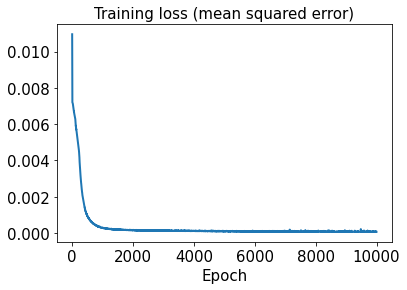

In [35]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

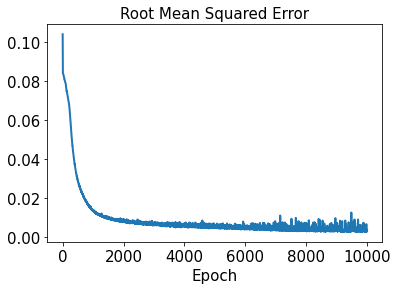

In [36]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [37]:
test_results = sd.evaluate(tsr_theta_train)

13/13 [==============================] - 0s 2ms/step - loss: 4.7599e-05 - rmse: 0.0000e+00


In [38]:
decoded_train = sd.predict(tsr_theta_train)

In [39]:
decoded_test = sd.predict(tsr_theta_test)

In [40]:
error_train_abs = np.abs(decoded_train - y_train)

In [41]:
error_test_abs = np.abs(decoded_test - y_test)

In [42]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0011949091


In [43]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.006282227


In [44]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0018652062, 0.0008768567, 0.00080295245, 0.0017491659, 0.0023961582, 0.000454363, 0.0007071718, 0.0015495266, 0.0006351574, 0.0010477382, 0.0027863155, 0.0016278572, 0.00095511245, 0.0020419527, 0.002284179, 0.0012327087, 0.0021506664, 0.00071445096, 0.0008833552, 0.0011503729, 0.0011365863, 0.001111155, 0.0009874335, 0.0020350723, 0.0013193394, 0.00079266465, 0.001136211, 0.0006518688, 0.0013138197, 0.0014016295, 0.0011822387, 0.00082603825, 0.0012327058, 0.0018761846, 0.0014243879, 0.00089291023, 0.0004890092, 0.00067256147, 0.0016968679, 0.0020040788, 0.0014508344, 0.0009266947, 0.0014288379, 0.0014960808, 0.00061745686, 0.00094952836, 0.0015314026, 0.0007409301, 0.0008586045, 0.00042737077, 0.0006501899, 0.000952991, 0.0016970565, 0.00093546085, 0.0016158673, 0.00080742815, 0.001358689, 0.001554789, 0.0011538252, 0.0011832183, 0.0015508594, 0.00087814184, 0.0006741753, 0.0013944359, 0.00073787605, 0.0007587435, 0.00083935214, 0.001504392, 0.001520105, 0.0005773431, 0.001731174, 

In [45]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.035994265, 0.0047732084, 0.0010755504, 0.0012824008, 0.002160182, 0.019718725, 0.016504094, 0.004183634, 0.0029667479, 0.000963037, 0.06218914, 0.0033793198, 0.0010702567, 0.0018544322, 0.0019585716, 0.0040907473, 0.0032728508, 0.0010204653, 0.015619066, 0.0015908653, 0.0025308249, 0.0010690449, 0.00243594, 0.0020039768, 0.00100082, 0.0028534185, 0.0024305861, 0.006304966, 0.003110812, 0.0020789811, 0.0012374147, 0.006847291, 0.0006881071, 0.0015415275, 0.0019618312, 0.023010666, 0.0018348136, 0.0011958824, 0.0017757998, 0.0016807413, 0.0029474115, 0.0034968357, 0.0013782643, 0.004680637]


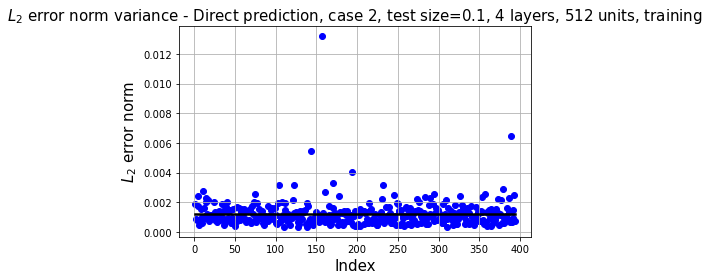

In [50]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, 4 layers, 512 units, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

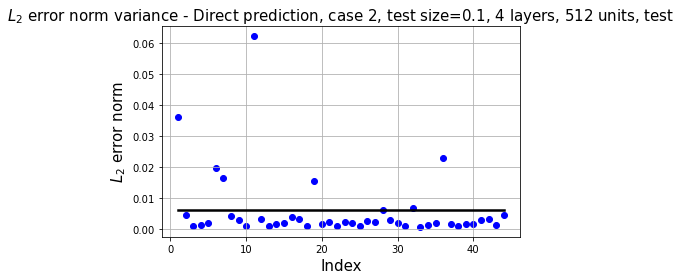

In [51]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, 4 layers, 512 units, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

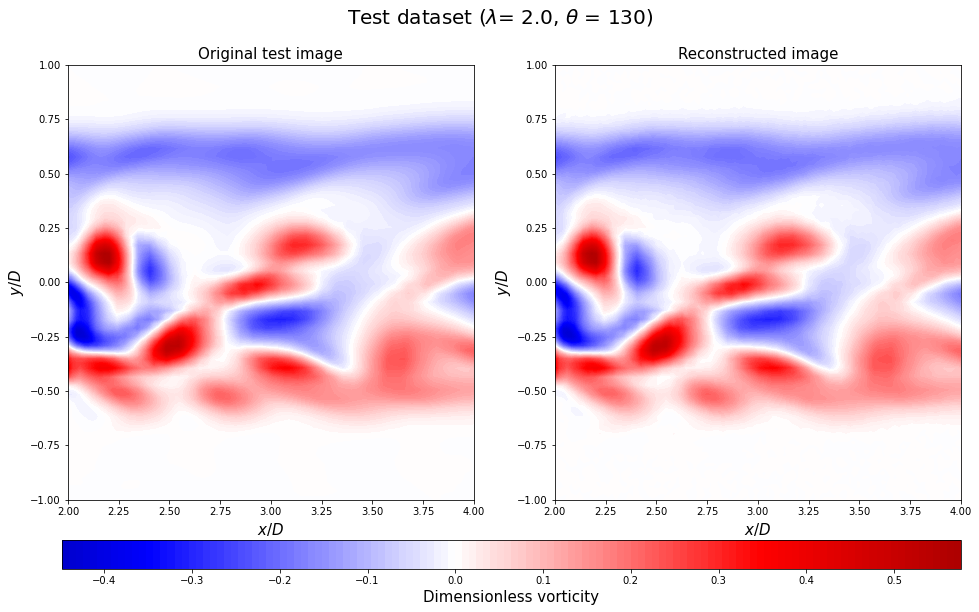

In [48]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

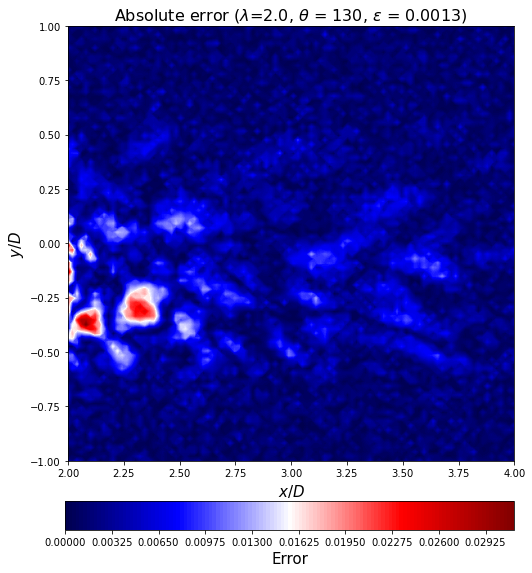

In [49]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()